In [1]:
# optimizer_compare_mnist.py
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

In [4]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.2904555936145936
Momentum:2.2944556298996646
AdaGrad:2.2469560440954846
Adam:2.1944347581475077
===========iteration:100===========
SGD:1.5206901224686802
Momentum:0.4935073794852163
AdaGrad:0.2546855233906228
Adam:0.44615683454237964
===========iteration:200===========
SGD:0.6853705135040278
Momentum:0.17478525160465366
AdaGrad:0.07869940360795172
Adam:0.15720480425439665
===========iteration:300===========
SGD:0.4797061743736305
Momentum:0.1152709478132024
AdaGrad:0.05820496825424389
Adam:0.07637812773955985
===========iteration:400===========
SGD:0.3570284383652156
Momentum:0.1813090950014739
AdaGrad:0.05138543472883165
Adam:0.15411494473369436
===========iteration:500===========
SGD:0.47410207747708366
Momentum:0.18240887186125757
AdaGrad:0.06324628391335585
Adam:0.1296063539258259
===========iteration:600===========
SGD:0.33696244224860056
Momentum:0.12311139563955771
AdaGrad:0.03951467992830294
Adam:0.15021278167270052
===========iteration:

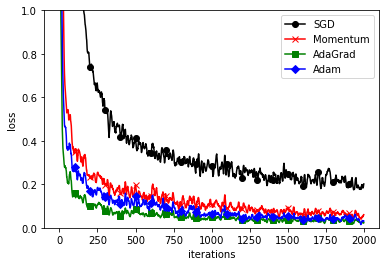

In [5]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
colors = {"SGD": "k", "Momentum": "r", "AdaGrad": "g", "Adam": "b"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], color=colors[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()